In [904]:
import pandas as pd 
import graphviz.backend as be

In [905]:
df = pd.read_csv(r'D:\Machine Learning\Desicion_tree\Regression_decision_tree\car_price_prediction.csv')

In [906]:
df

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,1,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,2,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,3,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,4,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,5,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Audi,2020,2.4,Petrol,Automatic,22650,Like New,61384.10,Q5
2496,2497,Audi,2001,5.7,Hybrid,Manual,77701,Like New,24710.35,A3
2497,2498,Ford,2021,1.1,Hybrid,Manual,272827,Like New,29902.45,Fiesta
2498,2499,Audi,2002,4.5,Diesel,Manual,229164,Like New,46085.67,Q5


In [907]:
df.select_dtypes(include='object').columns


Index(['Brand', 'Fuel Type', 'Transmission', 'Condition', 'Model'], dtype='object')

In [908]:
condition_map = {
    'Used': 0,
    'Like New': 1,
    'New': 2
}

df['Condition'] = df['Condition'].map(condition_map)


In [909]:
df.head(5)

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,1,Tesla,2016,2.3,Petrol,Manual,114832,2,26613.92,Model X
1,2,BMW,2018,4.4,Electric,Manual,143190,0,14679.61,5 Series
2,3,Audi,2013,4.5,Electric,Manual,181601,2,44402.61,A4
3,4,Tesla,2011,4.1,Diesel,Automatic,68682,2,86374.33,Model Y
4,5,Ford,2009,2.6,Diesel,Manual,223009,1,73577.10,Mustang


In [910]:
df.shape

(2500, 10)

In [911]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car ID        2500 non-null   int64  
 1   Brand         2500 non-null   object 
 2   Year          2500 non-null   int64  
 3   Engine Size   2500 non-null   float64
 4   Fuel Type     2500 non-null   object 
 5   Transmission  2500 non-null   object 
 6   Mileage       2500 non-null   int64  
 7   Condition     2500 non-null   int64  
 8   Price         2500 non-null   float64
 9   Model         2500 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 195.4+ KB


In [912]:
df.isnull().sum()

Car ID          0
Brand           0
Year            0
Engine Size     0
Fuel Type       0
Transmission    0
Mileage         0
Condition       0
Price           0
Model           0
dtype: int64

In [913]:
df['Brand'].unique()


array(['Tesla', 'BMW', 'Audi', 'Ford', 'Honda', 'Mercedes', 'Toyota'],
      dtype=object)

In [914]:
df['Brand'] = df['Brand'].map({'Toyota':0, 'Ford':1, 'BMW':2, 'Audi':3, 'Honda':4, 'Mercedes':5,'Tesla':6})

In [915]:
df['Fuel Type'].unique()

array(['Petrol', 'Electric', 'Diesel', 'Hybrid'], dtype=object)

In [916]:
df['Fuel Type'] = df['Fuel Type'].map({'Petrol':0, 'Diesel':1, 'Electric':2 , 'Hybrid':3})


In [917]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [918]:
df['Transmission'] = df['Transmission'].map({'Manual':5, 'Automatic':6})

In [919]:
df.describe()

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price
count,2500.00000,2500.000000,2500.0000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,1250.50000,2.971200,2011.6268,3.465240,1.474400,5.476800,149749.844800,0.981600,52638.022532
std,721.83216,2.000993,6.9917,1.432053,1.111143,0.499561,87919.952034,0.815799,27295.833455
min,1.00000,0.000000,2000.0000,1.000000,0.000000,5.000000,15.000000,0.000000,5011.270000
25%,625.75000,1.000000,2005.0000,2.200000,0.000000,5.000000,71831.500000,0.000000,28908.485000
50%,1250.50000,3.000000,2012.0000,3.400000,1.000000,5.000000,149085.000000,1.000000,53485.240000
75%,1875.25000,5.000000,2018.0000,4.700000,2.000000,6.000000,225990.500000,2.000000,75838.532500
max,2500.00000,6.000000,2023.0000,6.000000,3.000000,6.000000,299967.000000,2.000000,99982.590000


In [920]:
df.head()

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,1,6,2016,2.3,0,5,114832,2,26613.92,Model X
1,2,2,2018,4.4,2,5,143190,0,14679.61,5 Series
2,3,3,2013,4.5,2,5,181601,2,44402.61,A4
3,4,6,2011,4.1,1,6,68682,2,86374.33,Model Y
4,5,1,2009,2.6,1,5,223009,1,73577.10,Mustang


In [921]:
df.corr(numeric_only=True)['Price'].sort_values(ascending=False)


Price           1.000000
Brand           0.013676
Car ID          0.004650
Transmission    0.001877
Engine Size    -0.004420
Fuel Type      -0.006640
Condition      -0.008096
Mileage        -0.008567
Year           -0.036805
Name: Price, dtype: float64

In [922]:
x = df.drop(columns=['Model'])

y = df['Price']

In [923]:
x

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price
0,1,6,2016,2.3,0,5,114832,2,26613.92
1,2,2,2018,4.4,2,5,143190,0,14679.61
2,3,3,2013,4.5,2,5,181601,2,44402.61
3,4,6,2011,4.1,1,6,68682,2,86374.33
4,5,1,2009,2.6,1,5,223009,1,73577.10
...,...,...,...,...,...,...,...,...,...
2495,2496,3,2020,2.4,0,6,22650,1,61384.10
2496,2497,3,2001,5.7,3,5,77701,1,24710.35
2497,2498,1,2021,1.1,3,5,272827,1,29902.45
2498,2499,3,2002,4.5,1,5,229164,1,46085.67


In [924]:
x.isnull().sum()

Car ID          0
Brand           0
Year            0
Engine Size     0
Fuel Type       0
Transmission    0
Mileage         0
Condition       0
Price           0
dtype: int64

In [925]:
y

0       26613.92
1       14679.61
2       44402.61
3       86374.33
4       73577.10
          ...   
2495    61384.10
2496    24710.35
2497    29902.45
2498    46085.67
2499    16594.14
Name: Price, Length: 2500, dtype: float64

In [926]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [927]:
x_train

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price
2055,2056,5,2005,3.4,2,6,73401,2,97600.01
1961,1962,2,2004,1.6,1,5,252234,2,9212.70
1864,1865,6,2002,5.8,1,5,89882,1,89909.81
2326,2327,5,2000,4.6,1,5,275333,2,38235.97
461,462,4,2010,3.2,1,5,41190,1,77675.22
...,...,...,...,...,...,...,...,...,...
1638,1639,4,2018,4.9,0,5,69072,0,73142.61
1095,1096,5,2005,2.9,0,5,127521,1,82138.86
1130,1131,0,2014,3.2,1,5,80636,1,74003.92
1294,1295,1,2011,4.8,0,5,6336,0,14457.06


In [928]:
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor(max_depth=3, random_state=42)

In [929]:
reg.fit(x_train,y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


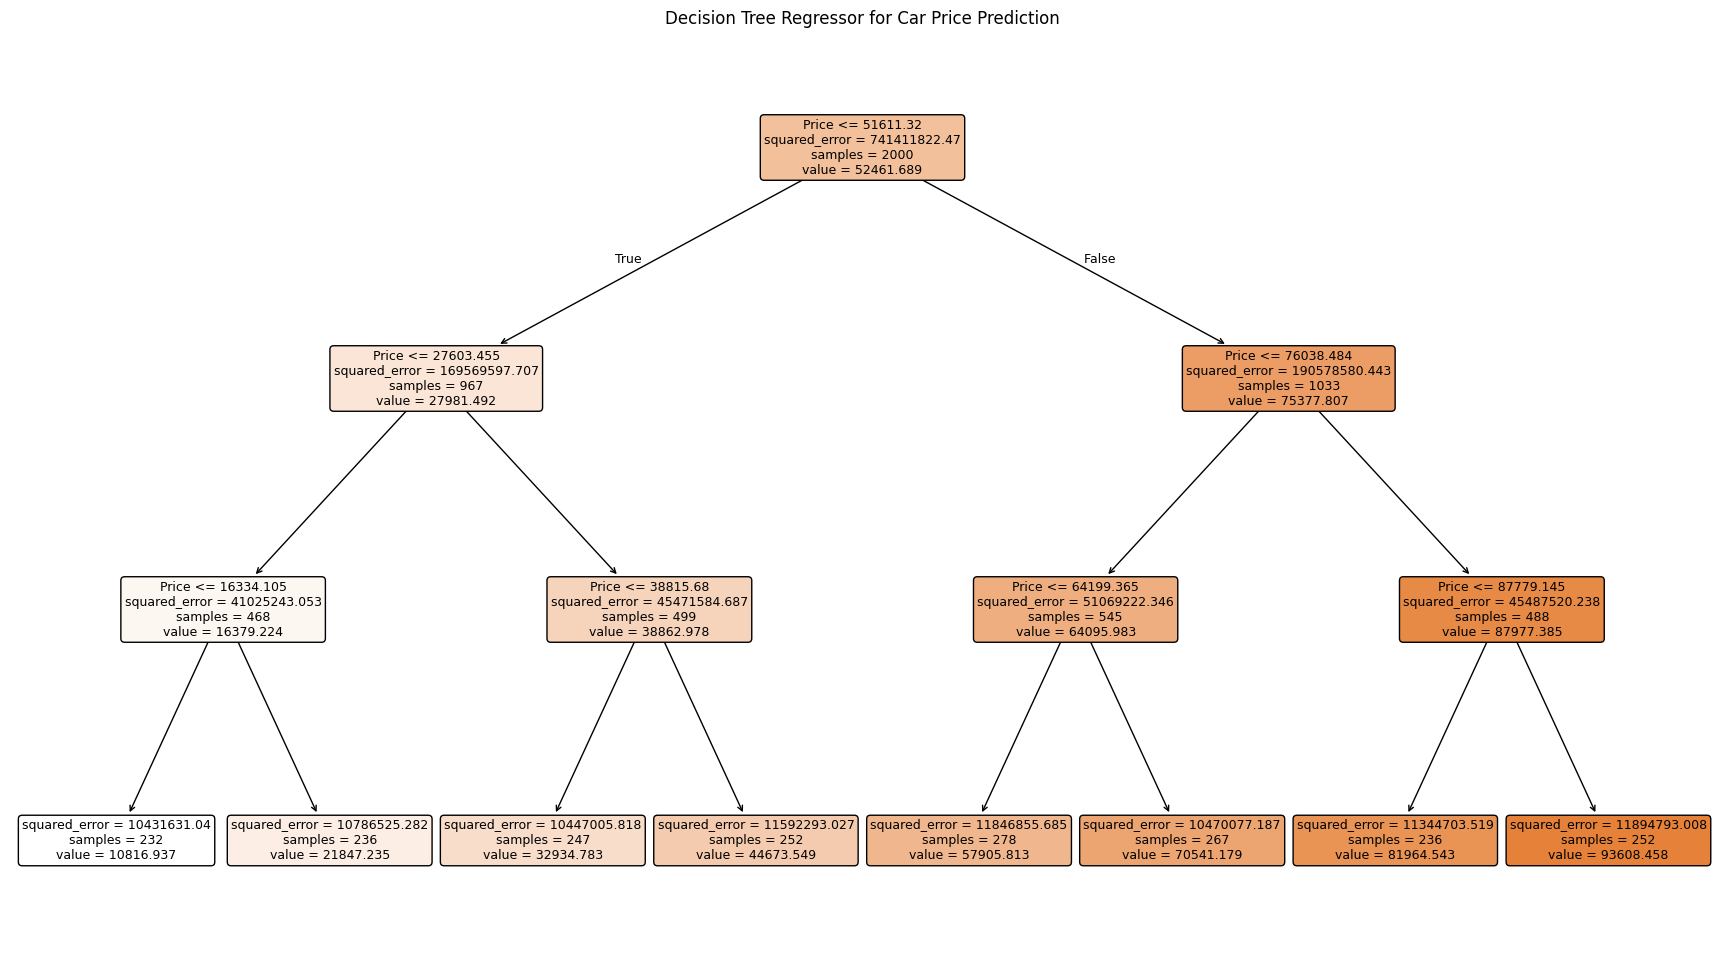

In [930]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(22,12))
plot_tree(
    reg,
    feature_names=x.columns,
    filled=True,
    rounded=True
    )
plt.title("Decision Tree Regressor for Car Price Prediction")
plt.show()


In [931]:
reg.get_depth()


3

In [932]:
x_test

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price
1447,1448,4,2010,3.0,1,5,211864,1,17494.90
1114,1115,6,2020,4.4,3,5,18781,1,75919.94
1064,1065,0,2013,4.3,1,5,55547,1,87474.10
2287,2288,0,2006,3.0,3,6,196914,0,13522.58
1537,1538,2,2016,5.5,0,6,67764,1,77070.57
...,...,...,...,...,...,...,...,...,...
2375,2376,4,2000,5.8,2,6,136421,1,18249.22
1609,1610,4,2019,5.8,3,5,299738,1,94121.24
596,597,4,2010,3.8,2,6,201264,0,72013.84
84,85,5,2018,4.5,0,6,58480,1,84585.18


In [933]:
y_pred_test = reg.predict(x_test)
y_pred_test

array([21847.23508475, 70541.1794382 , 81964.54309322, 10816.93676724,
       81964.54309322, 44673.54916667, 44673.54916667, 57905.81298561,
       21847.23508475, 32934.78327935, 70541.1794382 , 81964.54309322,
       93608.45837302, 44673.54916667, 57905.81298561, 81964.54309322,
       70541.1794382 , 21847.23508475, 10816.93676724, 21847.23508475,
       10816.93676724, 44673.54916667, 93608.45837302, 70541.1794382 ,
       44673.54916667, 44673.54916667, 81964.54309322, 81964.54309322,
       70541.1794382 , 81964.54309322, 93608.45837302, 10816.93676724,
       10816.93676724, 81964.54309322, 57905.81298561, 44673.54916667,
       10816.93676724, 44673.54916667, 21847.23508475, 57905.81298561,
       93608.45837302, 32934.78327935, 10816.93676724, 81964.54309322,
       21847.23508475, 21847.23508475, 81964.54309322, 44673.54916667,
       21847.23508475, 81964.54309322, 70541.1794382 , 10816.93676724,
       93608.45837302, 93608.45837302, 93608.45837302, 21847.23508475,
      

## Overfitting Demonstration (Very Important)

Let’s check training vs test error.

In [934]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y, reg.predict(x))


In [935]:
test_mse = mean_squared_error(y_test, y_pred_test)

print("Train MSE:", train_mse)
print("Test MSE:",test_mse)
print(test_mse - train_mse)
print("Relative difference ≈ ~9.6%")


Train MSE: 11387973.936104748
Test MSE: 12477467.66988324
1089493.7337784916
Relative difference ≈ ~9.6%


#### Since training and testing MSE values are close, the model does not show signs of overfitting and generalizes well to unseen data.